In [1]:
from sklearn.datasets import load_boston
boston = load_boston()

import pandas as pd 

boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df['Target'] = pd.Series(boston.target)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [4]:
boston_df['AGE'].mean() #centrality

68.57490118577076

In [5]:
boston_df['AGE'].median() #centrality

77.5

In [6]:
boston_df['AGE'].mode() #centrality

0    100.0
dtype: float64

In [7]:
boston_df['AGE'].count()

506

In [8]:
boston_df['TAX'].mean() #centrality

408.2371541501976

In [9]:
boston_df['TAX'].median() #centrality

330.0

In [10]:
boston_df['TAX'].mode() #centrality

0    666.0
dtype: float64

In [11]:
boston_df['DIS'].mean() #centrality

3.795042687747036

In [12]:
boston_df['DIS'].median() #centrality

3.2074499999999997

In [13]:
boston_df['DIS'].mode() #centrality

0    3.4952
dtype: float64

In [14]:
boston_df['AGE'].std() #dispersion

28.148861406903617

In [15]:
boston_df['AGE'].var() #dispersion

792.358398505068

In [16]:
boston_df['TAX'].std() #dispersion

168.53711605495903

In [17]:
boston_df['DIS'].std() #dispersion

2.105710126627611

In [19]:
boston_df['AGE'].quantile(.25)

45.025

In [20]:
boston_df['AGE'].quantile(.75)

94.07499999999999

In [21]:
boston_df['TAX'].quantile(.25)

279.0

In [22]:
boston_df['TAX'].quantile(.75)

666.0

In [23]:
boston_df['DIS'].quantile(.25)

2.100175

In [24]:
boston_df['DIS'].quantile(.75)

5.1884250000000005

In [41]:
#it will be interesting to see how tax and distance change with age of property
#i think that as age increases, that taxes will increase
#i think that as age increases, that distance will decrease
age_greaterthan_50 = boston_df.loc[boston_df['AGE']>=50]
age_lessthan_50 = boston_df.loc[boston_df['AGE']<50]
tax_greaterthan_400 = boston_df.loc[boston_df['TAX']>400]
tax_lessthan_400 = boston_df.loc[boston_df['TAX']<=400]
dis_greaterthan_3 = boston_df.loc[boston_df['DIS']>=3]
dis_lessthan_3 = boston_df.loc[boston_df['DIS']<3]

In [42]:
import matplotlib.pyplot as plt
%matplotlib notebook
plt.style.use('Solarize_Light2')

<IPython.core.display.Javascript object>


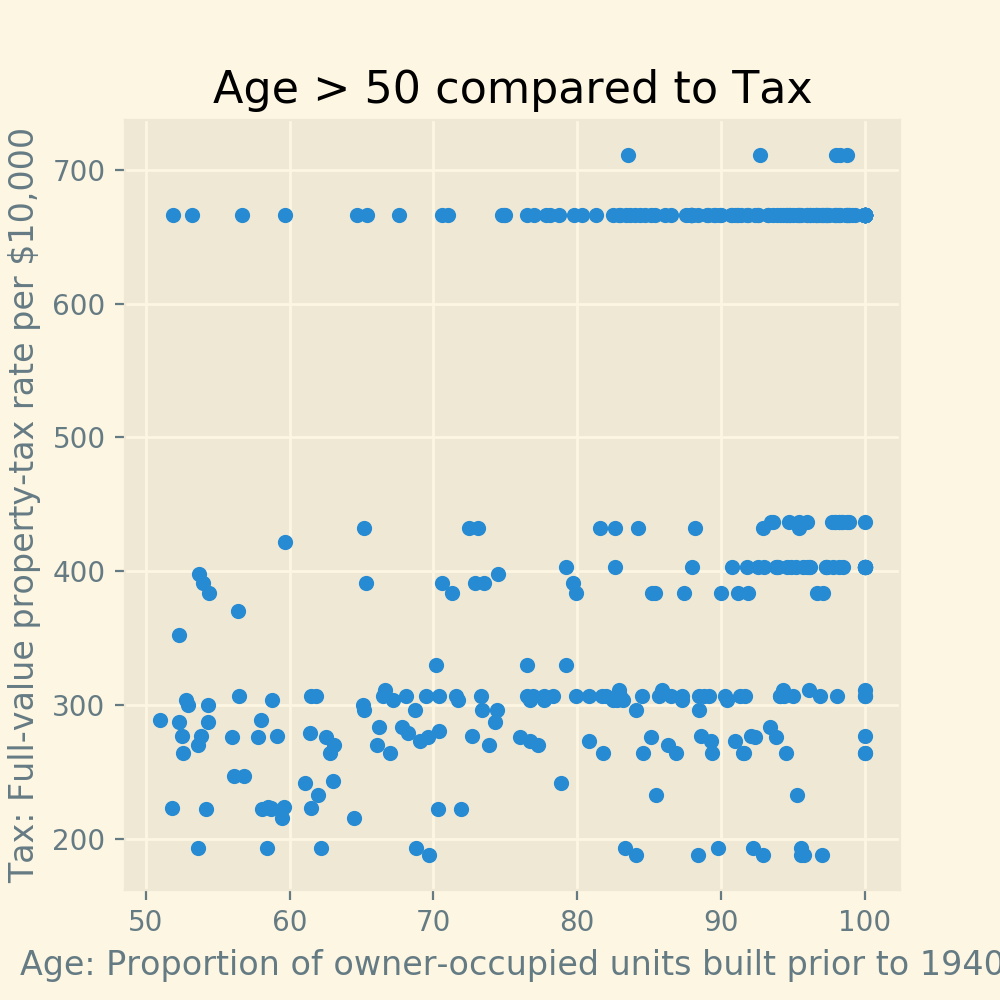

<IPython.core.display.Javascript object>


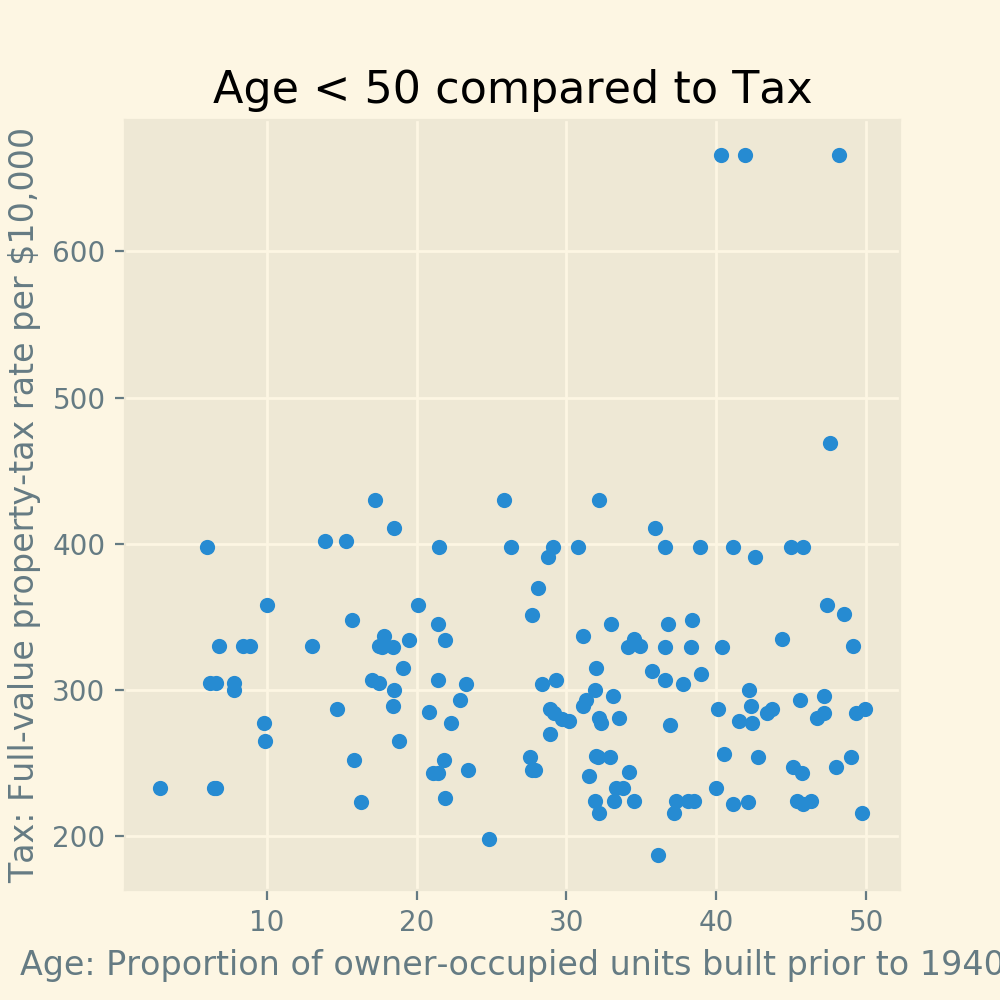

Text(0, 0.5, 'Tax: Full-value property-tax rate per $10,000')

In [59]:
ax = age_greaterthan_50.plot(x=(['AGE']), y=(['TAX']), kind='scatter', figsize=(5,5));
ax.set_title('Age > 50 compared to Tax')
ax.set_xlabel('Age: Proportion of owner-occupied units built prior to 1940')
ax.set_ylabel('Tax: Full-value property-tax rate per $10,000')
ax2 = age_lessthan_50.plot(x=(['AGE']), y=(['TAX']), kind='scatter', figsize=(5,5));
ax2.set_title('Age < 50 compared to Tax')
ax2.set_xlabel('Age: Proportion of owner-occupied units built prior to 1940')
ax2.set_ylabel('Tax: Full-value property-tax rate per $10,000')

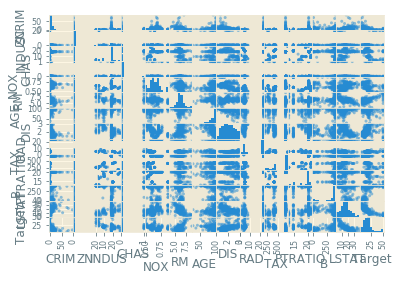

In [40]:
pd.plotting.scatter_matrix(dis_lessthan_3);